In [121]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [122]:
sm = pd.read_csv('./stockData/005930.csv', index_col=0, parse_dates=True)
sm = sm.sort_index() # 날짜 순으로 정렬한다
sm = sm.dropna()

In [123]:
sk = pd.read_csv('./stockData/000660.csv', index_col=0, parse_dates=True)
sk = sk.sort_index()
sk = sk.dropna()

In [124]:
lg = pd.read_csv('./stockData/066570.csv', index_col=0, parse_dates=True)
lg = lg.sort_index()
lg = lg.dropna()

In [125]:
lg.head()

,open,high,low,close,volume
date,,,,,
2011-05-12,110435,113367,108969,111412,2151061
2011-05-13,112390,116299,111412,112878,1857920
2011-05-16,112878,113367,109458,111412,997306
2011-05-17,110435,111412,108480,110435,798851
2011-05-18,109946,111412,108969,109458,747242


In [126]:
lg.tail()

,open,high,low,close,volume
date,,,,,
2019-06-19,82000,82200,80000,80800,600944
2019-06-20,80700,81500,80000,80500,426167
2019-06-21,80500,81100,79800,80400,479526
2019-06-24,81000,81300,80300,81300,340793
2019-06-25,81200,81300,80100,80200,220744


In [127]:
df = pd.DataFrame()
df['Samsung'] = sm['close']
df['SK_Hynix'] = sk['close']
df['LG'] = lg['close']

In [128]:
df.head()

,Samsung,SK_Hynix,LG
date,,,
2011-05-12,17700,33750,111412
2011-05-13,18320,34500,112878
2011-05-16,18020,34400,111412
2011-05-17,17800,33100,110435
2011-05-18,17860,32800,109458


scale 통일시켜보자(데이터 내용 100 기준으로 맞추어 나열해보자)  
17700 / 17700 X 100  
183020 / 17700 x 100  
    .  
    .  
    .  

In [129]:
df['Samsung'].iloc[0]  #0번째 i-location넣어서 찾아봐->얘가 기준가!

17700

In [130]:
df['Samsung_index'] = 100 * df['Samsung'] / df['Samsung'].iloc[0]
df['SK_index'] = 100 * df['SK_Hynix'] / df['SK_Hynix'].iloc[0]
df['LG_index'] = 100 * df['LG'] / df['LG'].iloc[0]

In [131]:
df.head() #스케일 통일

,Samsung,SK_Hynix,LG,Samsung_index,SK_index,LG_index
date,,,,,,
2011-05-12,17700,33750,111412,100.000000,100.000000,100.000000
2011-05-13,18320,34500,112878,103.502825,102.222222,101.315837
2011-05-16,18020,34400,111412,101.807910,101.925926,100.000000
2011-05-17,17800,33100,110435,100.564972,98.074074,99.123075
2011-05-18,17860,32800,109458,100.903955,97.185185,98.246149


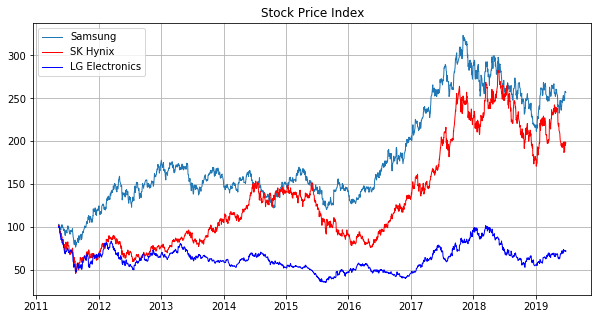

In [132]:
#통일된 스케일 차트화-> 한번에 볼 수 있는 장점이 있다 : "지수화", 비교대상의 표준화
plt.figure(1, figsize=(10, 5))
plt.plot(df['Samsung_index'], linewidth=1,label="Samsung")
plt.plot(df['SK_index'], linewidth=1, color='red', label="SK Hynix")
plt.plot(df['LG_index'], linewidth=1, color='blue', label="LG Electronics")
plt.title("Stock Price Index")
plt.grid()
plt.legend()
plt.show()

#### Normalized Price Index (NPI)

In [133]:
df['Samsung_npi'] = (df['Samsung'] - np.mean(df['Samsung'])) / np.std(df['Samsung'])
df['SK_npi'] = (df['SK_Hynix'] - np.mean(df['SK_Hynix'])) / np.std(df['SK_Hynix'])
df['LG_npi'] = (df['LG'] - np.mean(df['LG'])) / np.std(df['LG'])

In [134]:
df.head()

,Samsung,SK_Hynix,LG,Samsung_index,SK_index,LG_index,Samsung_npi,SK_npi,LG_npi
date,,,,,,,,,
2011-05-12,17700,33750,111412,100.000000,100.000000,100.000000,-1.393157,-0.548778,2.866270
2011-05-13,18320,34500,112878,103.502825,102.222222,101.315837,-1.332620,-0.511397,2.968004
2011-05-16,18020,34400,111412,101.807910,101.925926,100.000000,-1.361912,-0.516381,2.866270
2011-05-17,17800,33100,110435,100.564972,98.074074,99.123075,-1.383393,-0.581175,2.798471
2011-05-18,17860,32800,109458,100.903955,97.185185,98.246149,-1.377535,-0.596128,2.730672


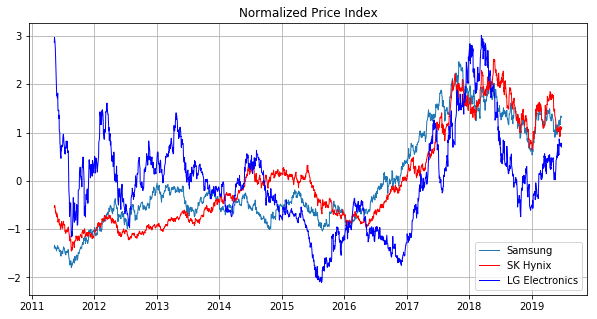

In [135]:
plt.figure(1, figsize=(10, 5))
plt.plot(df['Samsung_npi'], linewidth=1,label="Samsung")
plt.plot(df['SK_npi'], linewidth=1, color='red', label="SK Hynix")
plt.plot(df['LG_npi'], linewidth=1, color='blue', label="LG Electronics")
plt.title("Normalized Price Index")
plt.grid()
plt.legend()
plt.show()

In [136]:
print("가격 편차 :")
print("Samsung : {:,.2f}".format(np.std(df['Samsung'])))
print("SK Hynix : {:,.2f}".format(np.std(df['SK_Hynix'])))
print("LG Elec. : {:,.2f}".format(np.std(df['LG'])))

가격 편차 :
Samsung : 10,241.66
SK Hynix : 20,063.53
LG Elec. : 14,410.22


#### 포트폴리오 (Portfolio)

In [137]:
W = [0.3, 0.4, 0.3]   #삼성, SK, LG

In [138]:
df['Index'] = df['Samsung_index'] * W[0] + df['SK_index'] * W[1] + df['LG_index'] * W[2] 

In [139]:
df.head()  # index=분산투자의 결과, 합성된 하나의 어떤 종목과 같음. 종목의 가격( Price )

,Samsung,SK_Hynix,LG,Samsung_index,SK_index,LG_index,Samsung_npi,SK_npi,LG_npi,Index
date,,,,,,,,,,
2011-05-12,17700,33750,111412,100.000000,100.000000,100.000000,-1.393157,-0.548778,2.866270,100.000000
2011-05-13,18320,34500,112878,103.502825,102.222222,101.315837,-1.332620,-0.511397,2.968004,102.334487
2011-05-16,18020,34400,111412,101.807910,101.925926,100.000000,-1.361912,-0.516381,2.866270,101.312743
2011-05-17,17800,33100,110435,100.564972,98.074074,99.123075,-1.383393,-0.581175,2.798471,99.136044
2011-05-18,17860,32800,109458,100.903955,97.185185,98.246149,-1.377535,-0.596128,2.730672,98.619105


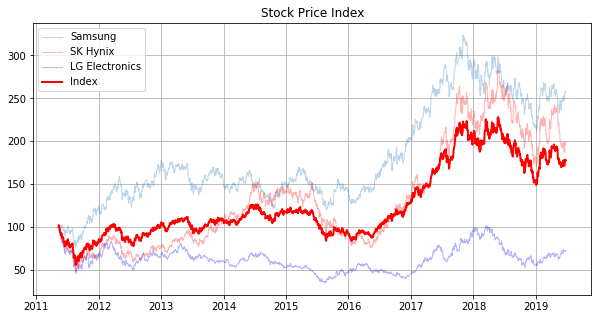

In [140]:
plt.figure(1, figsize=(10, 5))
plt.plot(df['Samsung_index'], linewidth=1, alpha=0.3, label="Samsung")
plt.plot(df['SK_index'], linewidth=1, color='red', alpha=0.3, label="SK Hynix")
plt.plot(df['LG_index'], linewidth=1, color='blue', alpha=0.3, label="LG Electronics")
plt.plot(df['Index'], linewidth=2, color='red', label="Index")
plt.title("Stock Price Index")
plt.grid()
plt.legend()
plt.show()

흐릿한 애들로 분산 투자되어  굵은 빨강이 합성 평균, 얘를 포트폴리오라 한다.  수익률, 이동평균들이 여기 담겨있어 
위에 애들 바뀜에 따라서 얘도 바뀌어. 내가 원하는 curve를 얻기 위해 최적의 W 비율을 찾는 것이 중요.

.무지하게 올라가는 커브: 수익률 대박,// 잔잔하게 서서히 올라가는 커브 만들고 싶다 등  : 포트폴리오 이론

## 과제

w=[0,0,0]  
수익률을 극대화할 것인가? 위험도를 적게 둘 것인가?(위험 회피형 투자자) ->투자자의 효용이 다르다.  
수익률/위험 (지표)=Sharp Ratio  
SR= R / σ   
SR가 Max되는 W값을 목표로 삼을 수 있다.(SR은 클 수록 좋다.)  
W를 임의로 바꿔가며 Sharp ratio를 조절해보아라.(포트폴리오의 종목 비중)

In [141]:
#수익률 r, 합성함수 100으로 기준해 둔 것에서 가져오자= log p1 - log p0
a=df['Index']
#'rtn'=return-- 여기서는 합성함수
df['rtn'] = np.log(a) - np.log(a.shift(1))

In [142]:
# r의 표준편차, 위험 : np.std(r)
year_risk = (df['rtn'].std())*np.sqrt(252)

# df['rtn'].mean()는 일일 위험 * 252(연간)
year_price = (df['rtn'].mean())*252

#연간 수익률 / 연간 변동성=Sharp Ratio
SR= year_price/year_risk
SR

0.28530651190236345

## 쌤 답안

In [143]:
w=[0.1, 0.4, 0,5]

In [144]:
df['Index']=df['Samsung_index'] * w[0] + df['SK_index'] * w[1] + df['LG_index'] * w[2]

In [145]:
df['rtn_index']=np.log(df['Index'])-np.log(df['Index'].shift(1))

In [146]:
SR= (np.mean(df['rtn_index']) * 252) / (np.std(df['rtn_index']) * np.sqrt(252))
# SR ='위험조정 수익률'
print(SR)

0.29533087929238877
